In [1]:
from search import ImageSearcher
import random
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import OPTICS, cluster_optics_dbscan

/home/glenn/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
%matplotlib inline
plt.style.use(['ggplot'])
import warnings
warnings.filterwarnings('ignore')

In [3]:
s = ImageSearcher()

### Query timing

In [4]:
es_query = s._create_query(key='title', value='space')

In [5]:
%timeit  s.es.search(index=s.index, body=es_query, size=1000)

33 ms ± 756 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%timeit  s.es.search(index=s.index, body=es_query, size=10000)

273 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
es_res = s.es.search(index=s.index, body=es_query, size=1000)

In [8]:
out = s._query('title', 'space', cluster_output=True)

100%|██████████| 5000/5000 [02:27<00:00, 33.83it/s]


### Results and clustering

In [10]:
outp_1, clusters_1, extra_info_1 = s._query("title", "cats", cluster_output=True)

100%|██████████| 5000/5000 [02:26<00:00, 34.12it/s]


In [11]:
outp_2, clusters_2, extra_info_2 = s._query("title", "cats and dogs", cluster_output=True)

100%|██████████| 5000/5000 [03:09<00:00, 26.44it/s]


In [12]:
outp_3, clusters_3, extra_info_3 = s._query("title", "space", cluster_output=True)

100%|██████████| 5000/5000 [02:36<00:00, 31.89it/s]


In [13]:
outp_1_lens = [len(x.split(' ')) for x in list(outp_1.keys())]

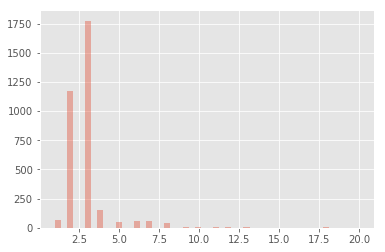

In [26]:
sns.distplot(outp_1_lens, kde=False)

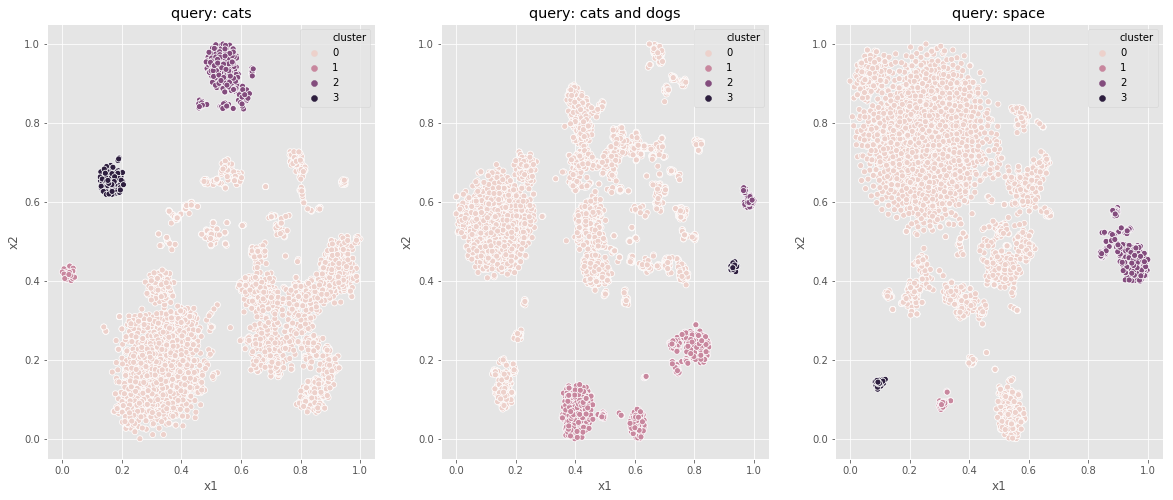

In [25]:
f, axes = plt.subplots(1,3, figsize=(20,8))
g1 = sns.scatterplot(x='x1', y='x2', hue='cluster', data=extra_info_1, ax=axes[0])
g1.set_title('query: cats')
g2 = sns.scatterplot(x='x1', y='x2', hue='cluster', data=extra_info_2, ax=axes[1])
g2.set_title('query: cats and dogs')
g3 = sns.scatterplot(x='x1', y='x2', hue='cluster', data=extra_info_3, ax=axes[2])
g3.set_title('query: space')
f.savefig('tsne_5.png')

### Samples

In [16]:
df = {k:v.tolist() for k,v in outp_2.items()}
df = pd.DataFrame(df).T

In [17]:
cos=pd.DataFrame(cosine_similarity(df), index=df.index, columns=list(df.index))

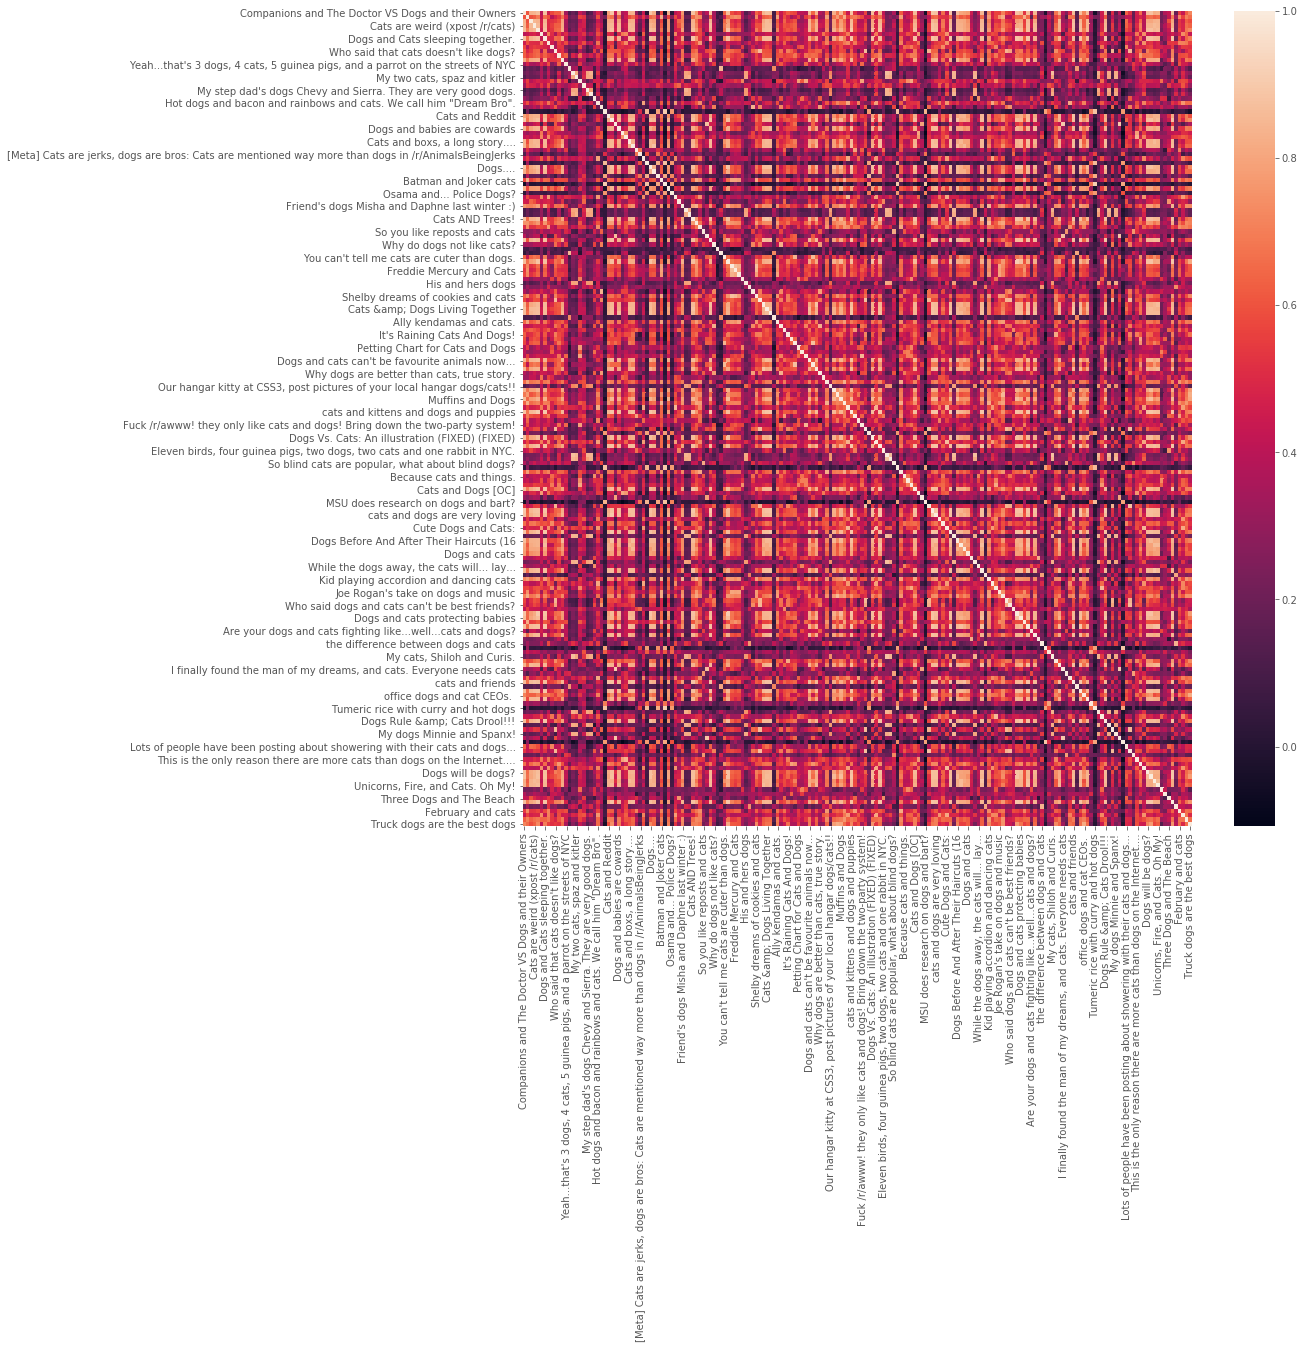

<Figure size 432x288 with 0 Axes>

In [24]:
sample = cos.sample(frac=0.05)
sample = sample[list(sample.index)]
plt.figure(figsize=(15,15))
gx=sns.heatmap(sample)
plt.show()
plt.tight_layout()
gx.get_figure().savefig('adjacency_matrix_2.svg')

In [19]:
cos['cats on top of dogs'].sort_values(ascending=False).head()

cats on top of dogs            1.000000
Dogs News, Video and Gossip    0.913860
Cats on Dogs – Janet Carr @    0.913699
Dogs and Cats realization.     0.911142
Cats, sex, and kittens         0.909939
Name: cats on top of dogs, dtype: float64

In [20]:
cos['cats on top of dogs'].sort_values(ascending=True).head()

PLarge and Small Dogs Play Together Safely                                                                     -0.078751
OAG and cats all in one!                                                                                       -0.052751
AHHHH! They're DOGS! And they're playing POKER!                                                                -0.027957
Minimalism and Cats                                                                                            -0.026681
BeddyPaws provides pet beds for dogs, cats and small animals. Visit our online shop now at www.beddypaws.com   -0.013650
Name: cats on top of dogs, dtype: float64

In [21]:
cos['Cats and Dogs'].sort_values(ascending=True).head()

PLarge and Small Dogs Play Together Safely                                                                     -0.050837
OAG and cats all in one!                                                                                       -0.049845
Minimalism and Cats                                                                                            -0.020599
AHHHH! They're DOGS! And they're playing POKER!                                                                -0.008028
BeddyPaws provides pet beds for dogs, cats and small animals. Visit our online shop now at www.beddypaws.com    0.006931
Name: Cats and Dogs, dtype: float64